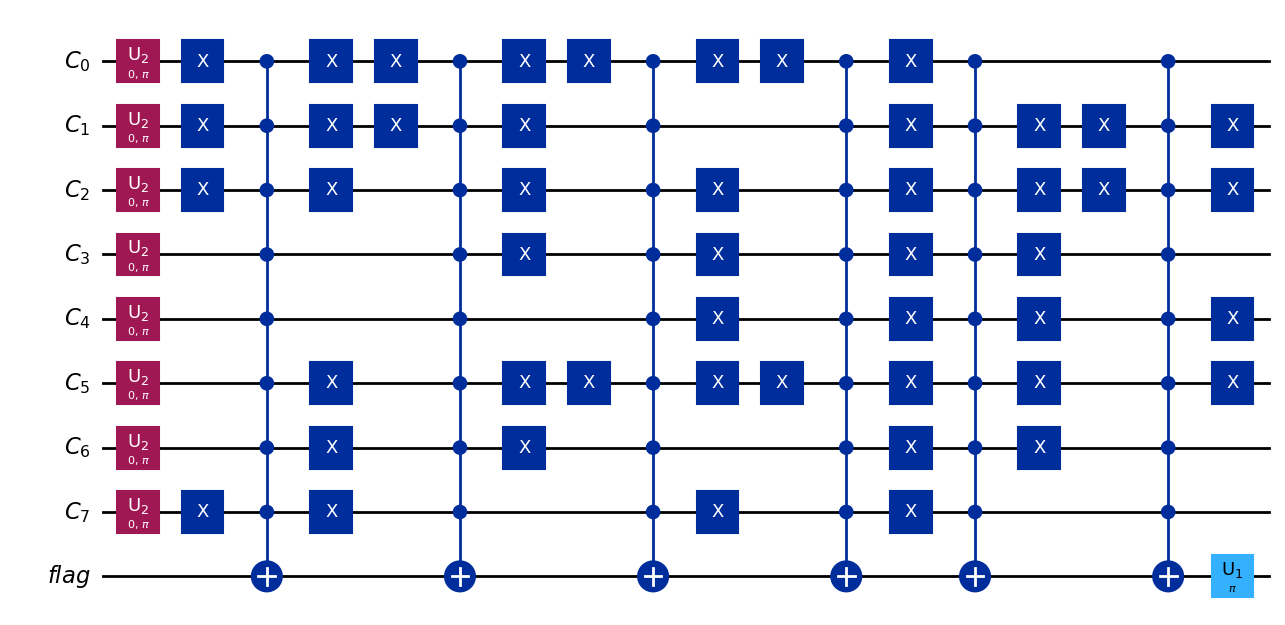

Output from HCD Encoding Test||
cycle|hamiltonian_flag
00000000| 0| 0
00000001| 0| 0
00000010| 0| 0
00000011| 0| 0
00000100| 0| 0
00000101| 0| 0
00000110| 0| 0
00000111| 0| 0
00001000| 0| 0
00001001| 0| 0
00001010| 0| 0
00001011| 0| 0
00001100| 0| 0
00001101| 0| 0
00001110| 0| 0
00001111| 0| 0
00010000| 0| 0
00010001| 0| 0
00010010| 0| 0
00010011| 0| 0
00010100| 0| 0
00010101| 0| 0
00010110| 0| 0
00010111| 0| 0
00011000| 0| 0
00011001| 0| 0
00011010| 0| 0
00011011| 0| 0
00011100| 0| 0
00011101| 0| 0
00011110| 0| 0
00011111| 0| 0
00100000| 0| 0
00100001| 0| 0
00100010| 0| 0
00100011| 0| 0
00100100| 0| 0
00100101| 0| 0
00100110| 0| 0
00100111| 0| 0
00101000| 0| 0
00101001| 0| 0
00101010| 0| 0
00101011| 0| 0
00101100| 0| 0
00101101| 0| 0
00101110| 0| 0
00101111| 0| 0
00110000| 0| 0
00110001| 0| 0
00110010| 0| 0
00110011| 0| 0
00110100| 0| 0
00110101| 0| 0
00110110| 0| 0
00110111| 0| 0
00111000| 0| 0
00111001| 0| 0
00111010| 0| 0
00111011| 0| 0
00111100| 0| 0
00111101| 0| 0
00111110| 0| 0


In [1]:
import warnings
warnings.filterwarnings("ignore")

from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit_aer import Aer
from hcd_encoding import create_state_circuit
import numpy as np

# --- Quantum Registers ---
flag = QuantumRegister(1, 'flag')          # Marking solutions which are under the threshold
cycle = QuantumRegister(8, 'C')            # Cycle qubits

qc = QuantumCircuit(cycle, flag)
qc.h(cycle)  # superposition over tours

hcd = create_state_circuit()
qc.append(hcd,[*cycle, *flag])
qc.z(flag)
display(qc.decompose().draw("mpl"))


# Simulate the statevector
backend = Aer.get_backend('statevector_simulator')
compiled = transpile(qc, backend)
result = backend.run(compiled).result()
state = result.get_statevector()

print("Output from HCD Encoding Test||")
print("cycle|hamiltonian_flag")
# Print basis states where ancilla (q9) is |1⟩
for i, amp in enumerate(state):
    if not np.isclose(abs(amp), 0):
        bin_state = format(i, f'0{qc.num_qubits}b')  # 9-bit string
        phase = np.angle(amp)
        eps = 1e-10
        if abs(phase) < eps:
            phase = 0
        print(f"{bin_state[1:9]}| {bin_state[0]}| {phase}")
